# Basic Model Testing

We will be training a basic SGD Model just to check whether the data has any problems or irregularities, which can create problems later on.

We will need to load in both train and inference set and slice in a validation set on which we can validate our trained model which will be infered on the inference data set.

**Load in all the basic packages and libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load in packages for Feature Engineering and ML**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

**Load in Train DataSet**

In [3]:
df = pd.read_csv('./lang_label/europarl.csv')
df.head()

,text,label
0,състав на парламента вж протоколи,bg
1,одобряване на протокола от предишното заседани...,bg
2,състав на парламента вж протоколи,bg
3,проверка на пълномощията вж протоколи,bg
4,внасяне на документи вж протоколи,bg


In [4]:
lang_label = ['bg','cs','da','de','el','en','es','et','fi','fr','hu','it','lt','lv','nl','pl','pt','ro','sk','sl','sv']

In [5]:
X = df.text.values
y = df.label.values

In [6]:
tfidf = TfidfVectorizer(max_df=0.7, min_df=0.01)
X_tfidf = tfidf.fit_transform(X)

In [7]:
X_tfidf

<187065x7712 sparse matrix of type '<class 'numpy.float64'>'
	with 24127639 stored elements in Compressed Sparse Row format>

**As seen above TFIDF transfrom the text into a Sparse Matrix having numerical values**

This can be used directly to be fed into the training model.

### Splitting the Dataset into Train and Validation Dataset

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X_tfidf, y, test_size = 0.1, random_state=1234)

### Fitting a SGD model onto the training dataset

In [9]:
SGD = SGDClassifier(max_iter=5, n_jobs=-1, loss='modified_huber')
SGD.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=5,
       n_iter=None, n_jobs=-1, penalty='l2', power_t=0.5,
       random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [10]:
y_pred = SGD.predict(X_valid)
print("Validation Accuracy:")
np.mean(y_valid==y_pred)*100

Validation Accuracy:


95.09274603089753

### Generating a Confusion Matrix for Validation Data

In [11]:
cm = confusion_matrix(y_valid, y_pred)
cm_norm = cm.astype('float')/cm.sum(axis=1)

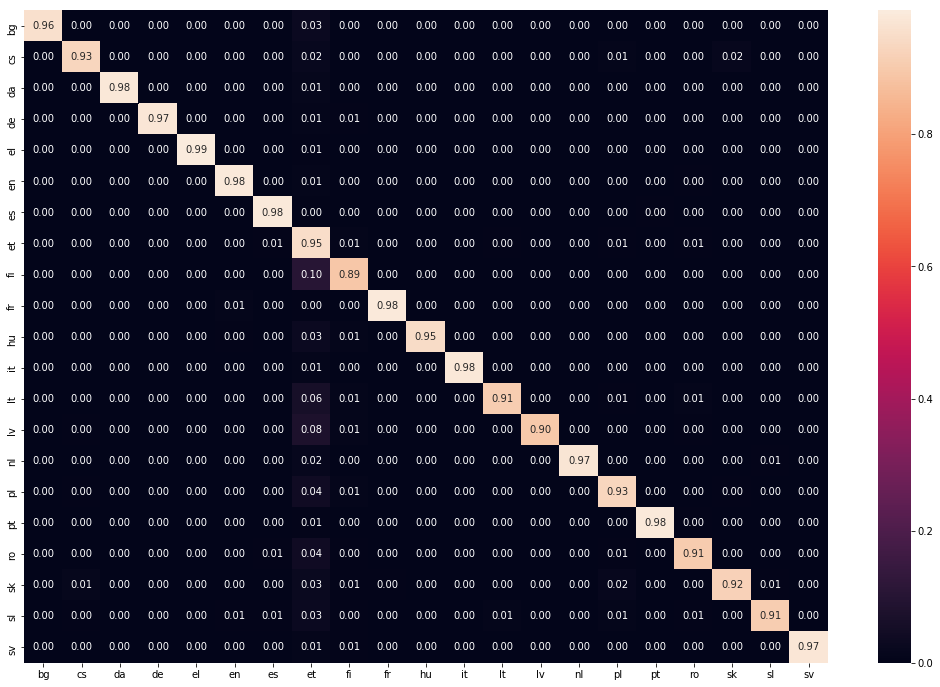

In [12]:
plt.figure(figsize = (18,12))
sns.heatmap(cm_norm, annot=True, fmt=".2f", xticklabels=lang_label, yticklabels=lang_label)

## Loading in Test Dataset

In [13]:
test_df = pd.read_csv('./test/europarl_test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20828 entries, 0 to 20827
Data columns (total 2 columns):
text     20828 non-null object
label    20828 non-null object
dtypes: object(2)
memory usage: 325.5+ KB


In [14]:
X_test = test_df.text.values
y_test = test_df.label.values

### Transforming text into TFIDF values based on Training Dataset

In [15]:
X_test = tfidf.transform(X_test).toarray()

### Predicting the Test Dataset

In [16]:
y_test_pred = SGD.predict(X_test)
print("Test Accuracy:")
np.mean(y_test==y_test_pred)*100

Test Accuracy:


90.21029383522182

### Plotting the Test Dataset Confusion Matrix

In [17]:
cm = confusion_matrix(y_test, y_test_pred)
cm_norm = cm.astype('float')/cm.sum(axis=1)

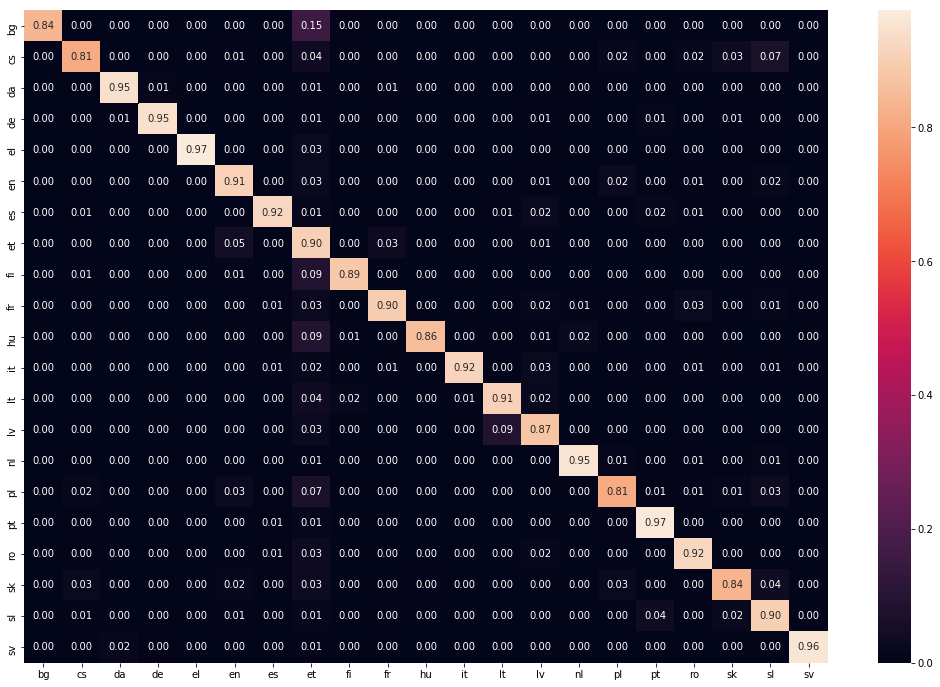

In [20]:
plt.figure(figsize = (18,12))
sns.heatmap(cm_norm, annot=True, fmt=".2f", xticklabels=lang_label, yticklabels=lang_label)

As seen from the above results and Confusion Matrix our model is performing well on some labels but making the more errors in almost all Language Labels

To be able to get an even better accuracy and improve the score, we will be training a Deep Neural Network in the next notebook, which will give us a State of the Art Result on our dataset.